In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

df = pd.read_csv("./lessVarsTest.csv")
#df = pd.read_csv("./test.csv")
#df = pd.read_csv("./newtest.csv")
print(df.head())
#print(df.shape)
#drop all rows where house purchase asset value is 0:
df = df[df['Assets_Value_If_Purchase'] > 0] # don't need now because it automatically waits till have money
print(df.shape)
#create labels column
BuyLabel = ['buy' for i in range(df.shape[0])]
RentLabel = ['rent' for i in range(df.shape[0])]
labels = np.where((df['Assets_Value_If_Purchase'] > df['Assets_Value_If_Rent']), BuyLabel, RentLabel)
del BuyLabel
del RentLabel
#drop purchase/rent assets value columns

#df = df.loc[:, : 'House_Growth']
#df = df.loc[:, : 'Years_Save_Before_Purch']
df = df.loc[:, : 'Rent']
print(df.head())

#scale down rent and house price columns - doesn't effect pca graph
#df['Rent'] = df['Rent'].div(1000)
#df['House_Price'] = df['House_Price'].div(1e6)

'''
pca = PCA(n_components=1, copy= False)
principalComponents = pca.fit_transform(normalizedDf)
principalDf = pd.DataFrame(data= principalComponents, columns= ['principal_component1', 'principal_component2'])
print(principalDf.head())
'''

   Rent_Growth  Long_Term_Return_Rate  Mortgage_Rate  House_Growth  \
0          0.0                   0.04           0.02           0.0   
1          0.0                   0.04           0.02           0.0   
2          0.0                   0.04           0.02           0.0   
3          0.0                   0.04           0.02           0.0   
4          0.0                   0.04           0.02           0.0   

   House Price  Rent  Assets_Value_If_Purchase  Assets_Value_If_Rent  
0      1250000  3000                  22530788              19983149  
1      1250000  3500                  22530788              19030507  
2      1250000  4000                  22530788              18077864  
3      1250000  4500                  21330650              17125221  
4      1250000  5000                  21330650              16172579  
(47047, 8)
   Rent_Growth  Long_Term_Return_Rate  Mortgage_Rate  House_Growth  \
0          0.0                   0.04           0.02           0.0   
1 

"\npca = PCA(n_components=1, copy= False)\nprincipalComponents = pca.fit_transform(normalizedDf)\nprincipalDf = pd.DataFrame(data= principalComponents, columns= ['principal_component1', 'principal_component2'])\nprint(principalDf.head())\n"

In [4]:
#normalize values of df
normalizedDf = pd.DataFrame(StandardScaler(copy= False).fit_transform(df)) 
print(normalizedDf.head())

         0    1         2         3         4         5
0 -1.45482 -1.5 -1.117315 -1.108912 -1.103984 -1.424160
1 -1.45482 -1.5 -1.117315 -1.108912 -1.103984 -0.915915
2 -1.45482 -1.5 -1.117315 -1.108912 -1.103984 -0.407670
3 -1.45482 -1.5 -1.117315 -1.108912 -1.103984  0.100575
4 -1.45482 -1.5 -1.117315 -1.108912 -1.103984  0.608820


c:\users\dan\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\dan\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [5]:
df['labels'] = labels.tolist()
print(df.head())
df.to_csv(path_or_buf= "./lessVarsWithLabels.csv")

   Rent_Growth  Long_Term_Return_Rate  Mortgage_Rate  House_Growth  \
0          0.0                   0.04           0.02           0.0   
1          0.0                   0.04           0.02           0.0   
2          0.0                   0.04           0.02           0.0   
3          0.0                   0.04           0.02           0.0   
4          0.0                   0.04           0.02           0.0   

   House Price  Rent labels  
0      1250000  3000    buy  
1      1250000  3500    buy  
2      1250000  4000    buy  
3      1250000  4500    buy  
4      1250000  5000    buy  


In [10]:
pca = PCA(n_components=2, copy=False)
principalComponents = pca.fit_transform(normalizedDf)
principalDf = pd.DataFrame(data= principalComponents, columns= ['principal_component1', 'principal_component2'])
#principalDf = pd.DataFrame(data= principalComponents, columns= ['principal_component1', 'principal_component2'])
print(principalDf.head())

   principal_component1  principal_component2
0             -0.226434             -0.766555
1             -0.255230             -0.479419
2             -0.284026             -0.192284
3             -0.312822              0.094852
4             -0.341618              0.381987


c:\users\dan\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


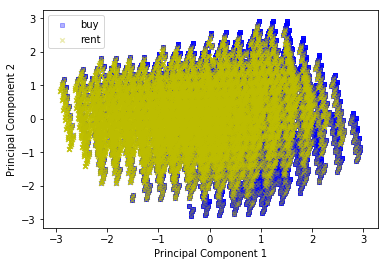

In [11]:
import matplotlib.pyplot as plt
from mlxtend.plotting import category_scatter
principalDf['labels'] = labels.tolist()
fig = category_scatter(x='principal_component1', y='principal_component2', label_col='labels', 
                       data=principalDf, legend_loc='upper left', colors = ('b', 'y'), alpha=0.3)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
fig.show()
fig.savefig("2ComponentPCA_v5-lowalpha.png")

In [8]:
print(pca.explained_variance_ratio_)
del principalDf

[0.24934911 0.19068897]


In [ ]:
rentDf = df[df['labels'] == 'rent']
buyDf = df[df['labels']  == 'buy']
print(rentDf.head())
print(buyDf.head())

In [ ]:
#print(rentDf.shape, buyDf.shape)
#print(set(rentDf['Mortgage_Rate']))


In [ ]:
'''
import matplotlib.pyplot as plt
principalDf.plot(kind='scatter',x='principal_component1',y='principal_component2',color='red')
plt.savefig("2ComponentPCA(notsure).png")
plt.show()
'''

In [ ]:
'''
import matplotlib.pyplot as plt
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.plot(x_axis, y_axis)
#plt.show()
plt.savefig("2ComponentPCA.png")
'''


In [ ]:
df.head()